# Mean reversion Models

Mean-reversion strategies work on the assumption that the price of an asset is prone to random fluctuation around an underlying stable trend. Therefore, values deviating far from the trend or observed mean will tend to reverse direction and revert to the mean. If the value is unusually high, we expect it to go back down and go up if it is unusually low. 


### We need to get data.. using Yahoo Finanice data.. AuquanToolbox is not working.. 

In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
#tsla_df = yf.download('TSLA', start='2019-01-01', end='2019-12-31', progress=False)
#tsla_df.head()


# Single-stock mean reversion

Mean reversion in the context of a stock price implies that periods of the price being far below the mean are followed by periods of the price going up, and vice versa. We can take advantage of this by buying the stock to go long when the price is lower than expected, and selling to go short when the price is higher than expected. We can plot the price of a stock along with the mean of the prices up to each day to see whether the price reverts to the mean.

In [2]:
# %matplotlib inline
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
#import auquanToolbox.dataloader as dl

In [3]:
from matplotlib import gridspec

In [12]:
ibm2 = yf.download('IBM', start='2020-05-15', end='2020-07-02', progress=False, interval='5m' )

In [14]:
ibm2.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-05-15 09:30:00-04:00,115.930000,116.449997,115.750000,115.800003,115.800003,248269
2020-05-15 09:35:00-04:00,115.820000,115.860001,115.250000,115.830002,115.830002,112459
2020-05-15 09:40:00-04:00,115.839996,116.699997,115.834999,116.660004,116.660004,45856
2020-05-15 09:45:00-04:00,116.699997,116.721397,116.339996,116.589996,116.589996,36927
2020-05-15 09:50:00-04:00,116.610001,117.040001,116.529999,116.959999,116.959999,60082


In [15]:
ibm2.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-07-01 15:35:00-04:00,118.995003,119.070000,118.940002,119.070000,119.070000,49903
2020-07-01 15:40:00-04:00,119.070000,119.230003,119.040001,119.139999,119.139999,82666
2020-07-01 15:45:00-04:00,119.144997,119.180000,119.010002,119.065002,119.065002,183809
2020-07-01 15:50:00-04:00,119.040001,119.059998,118.610001,118.650002,118.650002,130541
2020-07-01 15:55:00-04:00,118.644997,118.660004,118.370003,118.540001,118.540001,315374


In [4]:
def show_trend_end2end(ticker, start='2013-06-01', end='2016-12-31'):
#    data = yf.download(ticker, start=start, end=end, progress=False)
    data = get_data(ticker, start=start, end=end)
    prices, ss3 = identify_trend(data, ticker)
    return prices, ss3

def get_data(ticker, start='2015-01-01', end='2017-01-01'):
    return yf.download(ticker, start=start, end=end, progress=False)
    
def identify_trend(data, ticker):
    m = 'Adj Close'
    prices = pd.DataFrame(data[m])
    prices['ideal15'] = prices[m].rolling(10, center=True, win_type='hamming').mean()
    prices['mah15'] = prices[m].ewm(span=5, adjust=False).mean()
#    prices['mu'] = [prices[m][:i].mean() for i in range(len(prices))]
#    prices['mah5'] = prices[m].rolling(5, center=True, win_type='hamming').mean()
#    prices['mah30'] = prices[m].rolling(30, center=True, win_type='hamming').mean()
#    prices['mah60'] = prices[m].rolling(60, center=True, win_type='hamming').mean()
#    prices['sma90'] = prices[m].rolling(90, center=True).mean()
#    prices['sma200'] = prices[m].rolling(200, center=True).mean()
#    prices['sma30'] = prices[m].rolling(30, center=True).mean()
#    prices['sma60'] = prices[m].rolling(60, center=True).mean()
    ss1 = prices[m]
#    ss2 = ss1[ss1.index[0:ss1.shape[0]:5]]
#    ss3 = ss2.ewm(span=9, adjust=False).mean()
    ss2 = ss1[ss1.index[0:ss1.shape[0]:4]]
    ss3 = ss2.ewm(span=7, adjust=False).mean()
    prices['ema5'] = ss3
    prices['ema5'].interpolate(inplace=True)
    
    prices['sign']= (prices['mah15'] - prices['ema5'] > 0).astype(int)
    prices['sign2']= (prices['ideal15'] - prices['ema5'] > 0).astype(int)
    #tmprice['sign'] = tmprice['sign'].astype(int)
    prices['intersect']= prices['sign'] - prices['sign'].shift(1)
    prices['intersect2']= prices['sign2'] - prices['sign2'].shift(1)
    prices.dropna(axis=0, inplace=True)
    simple_ret = cal_return(prices)
#    simple_ret = 10
    
    fig = plt.figure(figsize=(15,15))
    plt.rcParams.update({'font.size': 16})
    gs = gridspec.GridSpec(2,1, height_ratios=[5,1])
    
    plt.subplot(gs[0])
    plt.plot(prices[m], label='Close')
    plt.plot(prices['mah15'], label='mah15');
    plt.plot(prices['ideal15'], label='ideal15');
    #plt.plot(prices['mu'], label='mu');
    #plt.plot(prices['mah30'], label='mah30');
    #plt.plot(prices['mah60'], label='mah60');
    ss3.plot(label='no adj')
    #plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2015-01-01'))
    plt.title(ticker)
    plt.legend();
    
#    plt.subplot(2,1,2)
    plt.subplot(gs[1])
    prices['intersect'].plot(label='intersect')
    prices['intersect2'].plot(label='intersect2')
    plt.title('buy=1, sell=-1 return = '+str(simple_ret)+'%')
    plt.legend()
    fig.tight_layout(pad=1.0)
    return prices, ss3


In [5]:
def cal_return(df0, intersect_name='intersect'):
    investment = 1000
    balance = investment
    shares = 0
    startFlag = True
    df = df0.loc[df0[intersect_name] != 0]
    for ind in df.index:
        buysell = df[intersect_name][ind]
        price = df['Adj Close'][ind]
        if startFlag:
            startFlag = False 
            if buysell < 0:
                print('no short,, skip..', ind, price, buysell)
                continue
        if buysell > 0:  # buy
            shares = balance / df['Adj Close'][ind]
            balance = 0
            print(ind, df['Adj Close'][ind], df[intersect_name][ind], 'buy:', shares, 'balance =', balance)
        else:
            balance = shares *  price
            shares = 0
            print(ind, df['Adj Close'][ind], df[intersect_name][ind], 'sell:', shares, 'balance =', balance)
            
    print ('balance=', balance, 'share:', shares)
    if shares > 0:
        balance = shares * df0.iloc[-1]['Adj Close']
        print('sell shares:', shares, 'balance=', balance)
        
    ret = round((balance - investment) / investment * 100, 2)
    print ('return =', ret)
    return ret
        
#cal_return(tmprice)
        
    

In [60]:
ss = np.array([1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 5.0, 6.0, 7.0])
sl = np.array([0.5, 1.5, 3.5, 4.5, 2.5, 1.5, 4.0, 3.5, 7.0, 8.0])
idx =  np.array(range(len(ss)))

In [63]:
idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
SS = pd.Series(data=ss, index=idx)
SL = pd.Series(data=sl, index=idx)
df5 = pd.DataFrame(data={'short':ss, 'long':sl}, index=idx)

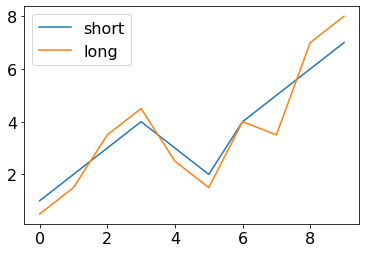

In [66]:
df5.plot()

In [91]:
def get_buysell_signal(s_short, s_long):
    df = pd.DataFrame()
    df['Short'] = s_short
    df['Long'] = s_long
    df['diff'] = tmp  = s_short - s_long
    df['sign'] = np.array([1.0 if x > 0 else (-1.0 if x < 0 else 0.0) for x in tmp])
    df['buysell'] = df['sign'] - df['sign'].shift(1)
    return df
    
    

In [92]:
get_buysell_signal(SS, SL)

,Short,Long,diff,sign,buysell
0,1.0,0.5,0.5,1.0,NaN
1,2.0,1.5,0.5,1.0,0.0
2,3.0,3.5,-0.5,-1.0,-2.0
3,4.0,4.5,-0.5,-1.0,0.0
4,3.0,2.5,0.5,1.0,2.0
5,2.0,1.5,0.5,1.0,0.0
6,4.0,4.0,0.0,0.0,-1.0
7,5.0,3.5,1.5,1.0,1.0
8,6.0,7.0,-1.0,-1.0,-2.0
9,7.0,8.0,-1.0,-1.0,0.0


In [84]:
a,b


(0    0.5
 1    0.5
 2   -0.5
 3   -0.5
 4    0.5
 5    0.5
 6    0.0
 7    1.5
 8   -1.0
 9   -1.0
 dtype: float64,
 array([ 1.,  1., -1., -1.,  1.,  1.,  0.,  1., -1., -1.]))

In [83]:
b

array([ 1.,  1., -1., -1.,  1.,  1.,  0.,  1., -1., -1.])

In [58]:
data = get_data('IBM')

In [59]:
#tmprice[(tmprice['intersect'] !=0)  | (tmprice['intersect2'] != 0)]
tmprice[(tmprice['intersect'] !=0)]


,Adj Close,ideal15,mah15,ema5,sign,sign2,intersect,intersect2
Date,,,,,,,,
2015-02-05,124.265396,123.761412,123.311418,123.214072,1,1,1.0,0.0
2015-03-10,125.057861,125.715439,126.386231,126.528393,0,0,-1.0,0.0
2015-03-20,129.075592,127.580556,126.796852,125.931960,1,1,1.0,0.0
2015-06-04,135.479660,135.673683,136.489717,136.604024,0,0,-1.0,0.0
2015-06-23,135.672729,134.664675,135.050664,134.952686,1,0,1.0,0.0
2015-06-24,134.345154,134.341795,134.815494,134.858140,0,0,-1.0,0.0
2015-07-13,136.284256,134.475326,133.967412,133.857120,1,1,1.0,1.0
2015-07-22,129.018646,132.491893,133.342688,134.490021,0,0,-1.0,0.0
2015-10-07,121.765900,121.216958,119.972216,119.835325,1,1,1.0,0.0


2015-02-05 00:00:00 124.26539611816406 1.0 buy: 8.047292578934035 balance = 0
2015-03-10 00:00:00 125.057861328125 -1.0 sell: 0 balance = 1006.377199403182
2015-03-20 00:00:00 129.07559204101562 1.0 buy: 7.796804829555933 balance = 0
2015-06-04 00:00:00 135.4796600341797 -1.0 sell: 0 balance = 1056.3084676610881
2015-06-23 00:00:00 135.6727294921875 1.0 buy: 7.785709564588026 balance = 0
2015-06-24 00:00:00 134.34515380859375 -1.0 sell: 0 balance = 1045.9723489636178
2015-07-13 00:00:00 136.2842559814453 1.0 buy: 7.674931645119916 balance = 0
2015-07-22 00:00:00 129.01864624023438 -1.0 sell: 0 balance = 990.2092908397065
2015-10-07 00:00:00 121.76589965820312 1.0 buy: 8.132073869771618 balance = 0
2015-10-20 00:00:00 114.09925079345703 -1.0 sell: 0 balance = 927.8635359379905
2015-12-01 00:00:00 115.6936264038086 1.0 buy: 8.020005637125102 balance = 0
2015-12-09 00:00:00 111.869384765625 -1.0 sell: 0 balance = 897.1930964420295
2015-12-24 00:00:00 113.21235656738281 1.0 buy: 7.92486901

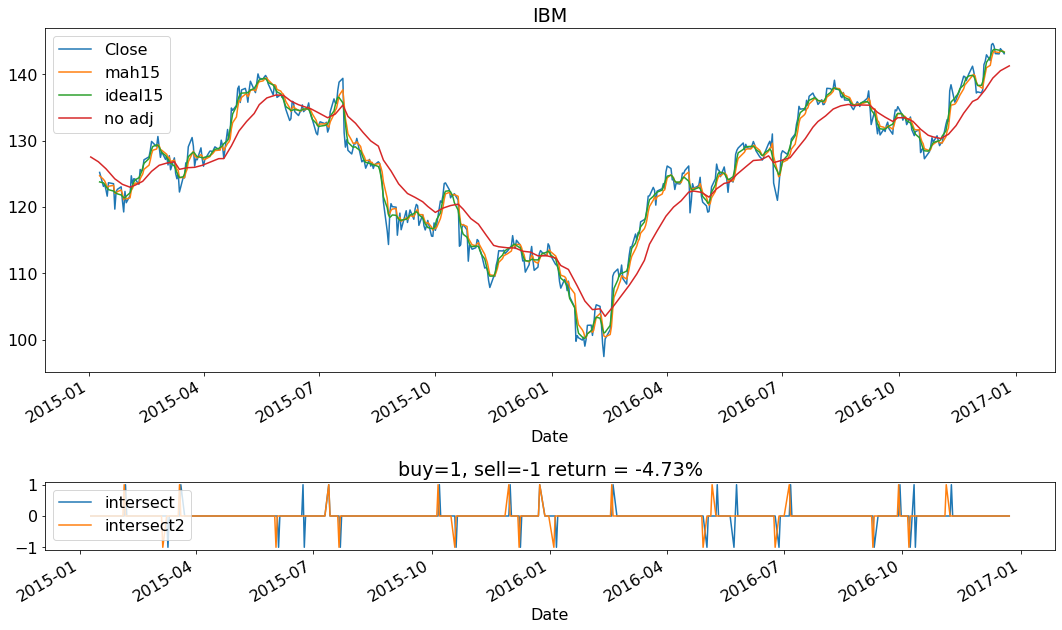

In [52]:
tmprice, tmpss3 = identify_trend(data, 'IBM')

2015-02-13 00:00:00 127.11031341552734 1.0 buy: 7.867182238241917 balance = 0
2015-03-11 00:00:00 124.25745391845703 -1.0 sell: 0 balance = 977.5560344364487
2015-03-20 00:00:00 129.07559204101562 1.0 buy: 7.573515790079167 balance = 0
2015-06-08 00:00:00 133.03363037109375 -1.0 sell: 0 balance = 1007.5323002270339
2015-07-16 00:00:00 137.5877227783203 1.0 buy: 7.322835787102588 balance = 0
2015-07-22 00:00:00 129.01864624023438 -1.0 sell: 0 balance = 944.782359891517
2015-10-09 00:00:00 123.63186645507812 1.0 buy: 7.641899996994751 balance = 0
2015-10-20 00:00:00 114.09925079345703 -1.0 sell: 0 balance = 871.9350642956226
2016-02-22 00:00:00 110.66264343261719 1.0 buy: 7.879217749091151 balance = 0
2016-06-27 00:00:00 121.0076904296875 -1.0 sell: 0 balance = 953.4459422101211
2016-07-01 00:00:00 128.4705352783203 1.0 buy: 7.421514514161266 balance = 0
2016-09-14 00:00:00 131.02598571777344 -1.0 sell: 0 balance = 972.4112547367423
2016-09-29 00:00:00 134.479248046875 1.0 buy: 7.2309391

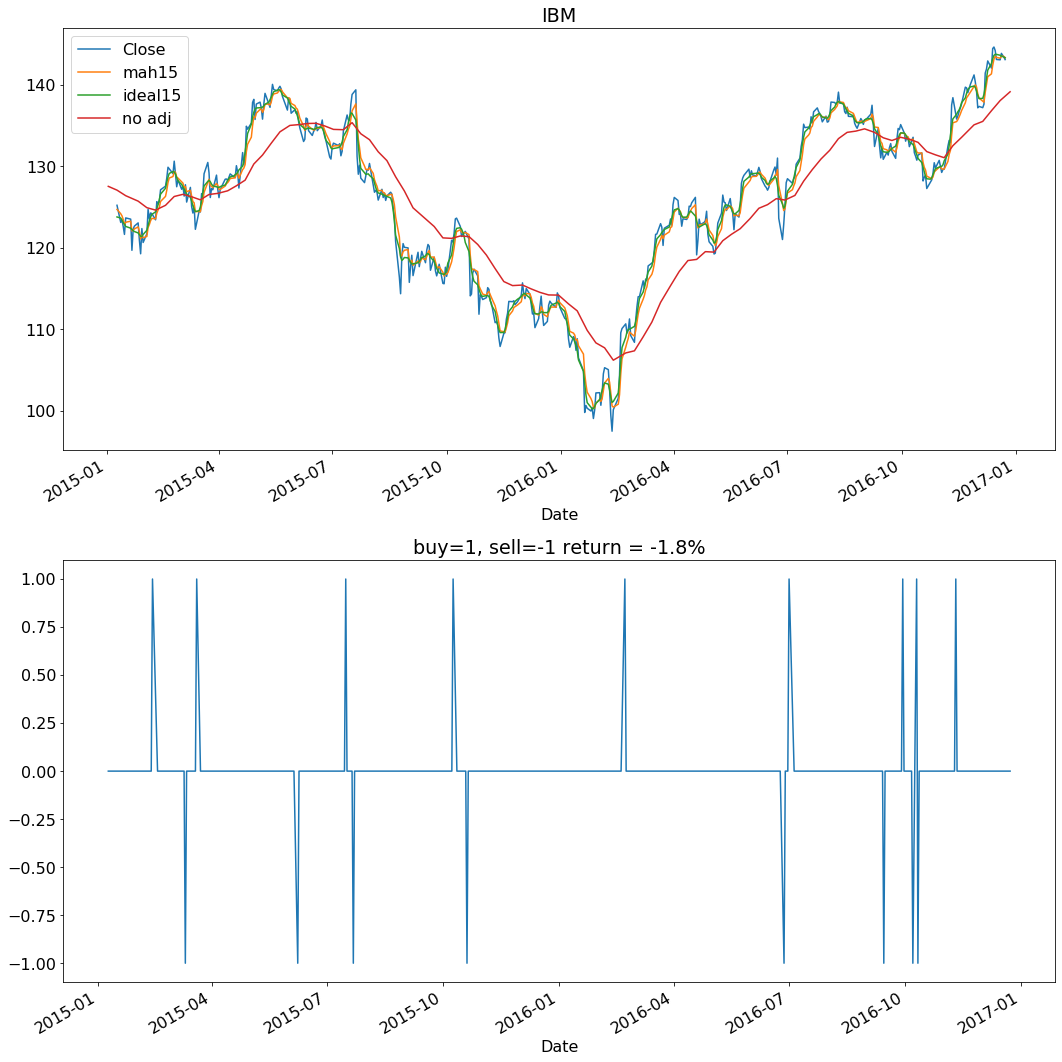

In [34]:
tmprice, tmpss3 = show_trend_end2end('IBM', start='2015-01-01', end='2017-01-01')

In [12]:
tmprice.head()

,Adj Close,mah15,ema5,sign,intersect
Date,,,,,
2013-06-10,155.892960,155.403439,158.283560,0,0.0
2013-06-11,155.102081,155.109971,158.127711,0,0.0
2013-06-12,152.988281,154.789586,157.971862,0,0.0
2013-06-13,154.942413,154.517574,157.816012,0,0.0
2013-06-14,153.748642,154.345098,157.660163,0,0.0


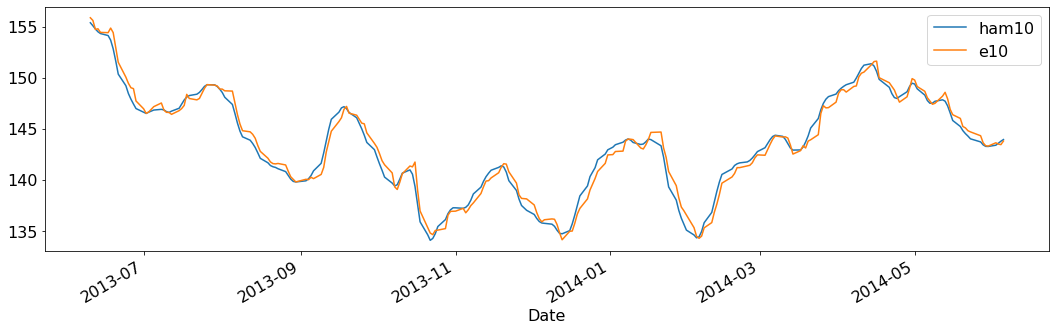

In [21]:
tmprice['m15'] = tmprice['Adj Close'].rolling(10, center=False, win_type='hamming').mean()
#ss3 = ss2.ewm(span=9, adjust=False).mean()
tmprice['e10'] = tmprice['Adj Close'].ewm(span=5, adjust=False).mean()
plt.figure(figsize=(18,5))
tmpdf = tmprice.iloc[0:250]
#tmpdf['Adj Close'].plot(label='close')
tmpdf['mah15'].plot(label='ham10')
#tmpdf['m15'].plot(label='m10')
#tmpdf['ema5'].plot(label='ema5')
tmpdf['e10'].plot(label='e10')
plt.legend()

2013-07-10 00:00:00 29.718950271606445 1.0 buy: 33.64856399236289 balance = 0
2013-07-16 00:00:00 31.06358528137207 -1.0 sell: 0 balance = 1045.2450371724701
2013-08-23 00:00:00 29.97149085998535 1.0 buy: 34.87464277487666 balance = 0
2013-08-30 00:00:00 28.8071346282959 -1.0 sell: 0 balance = 1004.6385295295988
2013-09-13 00:00:00 28.488019943237305 1.0 buy: 35.265298589770445 balance = 0
2014-01-06 00:00:00 31.398056030273438 -1.0 sell: 0 balance = 1107.2618210459352
2014-01-17 00:00:00 31.61532974243164 1.0 buy: 35.02294077166794 balance = 0
2014-10-08 00:00:00 41.5046501159668 -1.0 sell: 0 balance = 1453.614902760306
2014-10-23 00:00:00 39.943119049072266 1.0 buy: 36.39212303311772 balance = 0
2014-12-12 00:00:00 41.91819381713867 -1.0 sell: 0 balance = 1525.492066719385
2014-12-16 00:00:00 40.32004928588867 1.0 buy: 37.83457842283147 balance = 0
2014-12-31 00:00:00 41.47178268432617 -1.0 sell: 0 balance = 1569.0674143047627
2015-04-17 00:00:00 37.423885345458984 1.0 buy: 41.926897

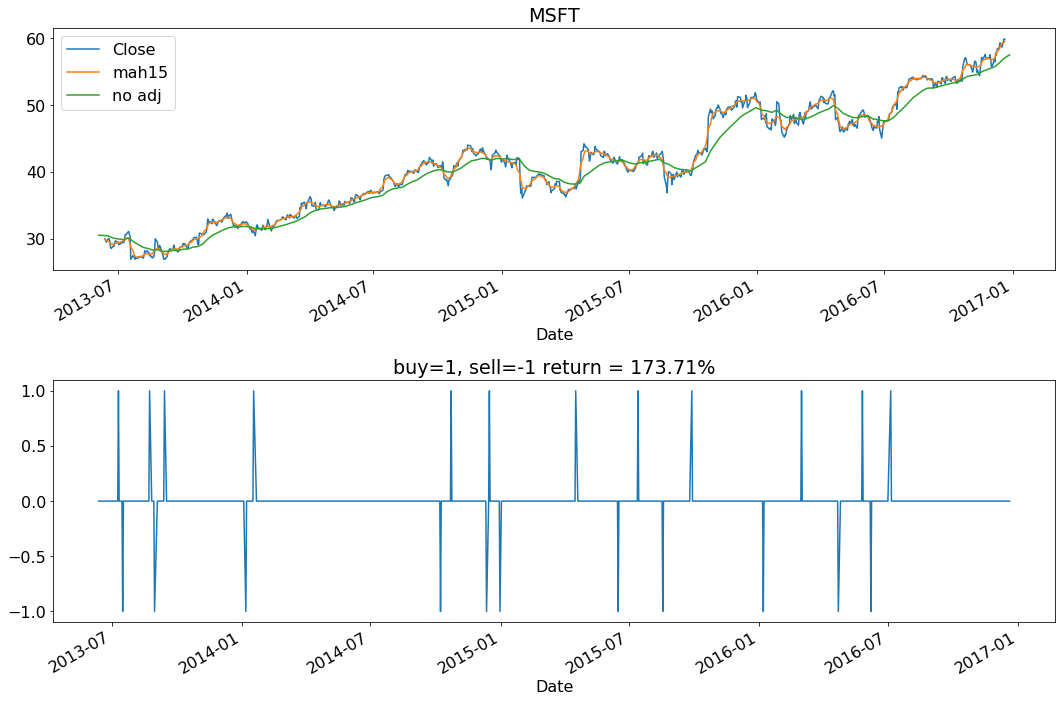

In [135]:
tmprice, tmpss3 = show_trend_end2end('MSFT')

2013-06-12 00:00:00 62.4909782409668 1.0 buy: 16.00230990374282 balance = 0
2013-06-17 00:00:00 63.58616638183594 -1.0 sell: 0 balance = 1017.5255400330919
2013-07-01 00:00:00 62.82919692993164 1.0 buy: 16.195106570721514 balance = 0
2013-08-20 00:00:00 64.52452087402344 -1.0 sell: 0 balance = 1044.9814919795544
2013-09-16 00:00:00 65.03568267822266 1.0 buy: 16.06781768017742 balance = 0
2013-09-23 00:00:00 64.3216781616211 -1.0 sell: 0 balance = 1033.5089975839774
2013-10-14 00:00:00 63.88358688354492 1.0 buy: 16.17800514971065 balance = 0
2013-12-18 00:00:00 67.35890197753906 -1.0 sell: 0 balance = 1089.7326630714817
2014-03-11 00:00:00 65.0422592163086 1.0 buy: 16.754225271410068 balance = 0
2014-05-19 00:00:00 66.37541198730469 -1.0 sell: 0 balance = 1112.0686049179549
2014-07-07 00:00:00 66.59132385253906 1.0 buy: 16.69990233833672 balance = 0
2014-07-24 00:00:00 67.18154907226562 -1.0 sell: 0 balance = 1121.9253084450118
2014-08-05 00:00:00 66.4700698852539 1.0 buy: 16.8786539623

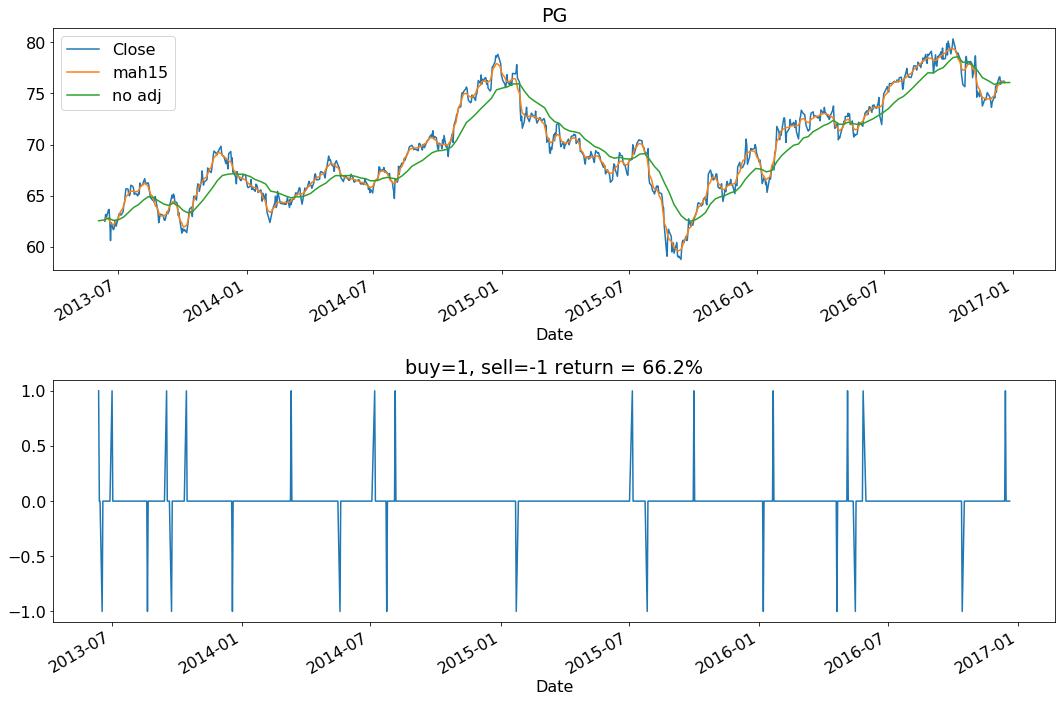

In [136]:
tmprice, tmpss3 = show_trend_end2end('PG')

In [123]:
cal_return(tmprice)

2013-07-10 00:00:00 29.718950271606445 1.0 buy: 33.64856399236289 balance = 0
2013-07-16 00:00:00 31.06358528137207 -1.0 sell: 0 balance = 1045.2450371724701
2013-08-23 00:00:00 29.97149085998535 1.0 buy: 34.87464277487666 balance = 0
2013-08-30 00:00:00 28.8071346282959 -1.0 sell: 0 balance = 1004.6385295295988
2013-09-13 00:00:00 28.488019943237305 1.0 buy: 35.265298589770445 balance = 0
2014-01-06 00:00:00 31.398056030273438 -1.0 sell: 0 balance = 1107.2618210459352
2014-01-17 00:00:00 31.61532974243164 1.0 buy: 35.02294077166794 balance = 0
2014-10-08 00:00:00 41.5046501159668 -1.0 sell: 0 balance = 1453.614902760306
2014-10-23 00:00:00 39.943119049072266 1.0 buy: 36.39212303311772 balance = 0
2014-12-12 00:00:00 41.91819381713867 -1.0 sell: 0 balance = 1525.492066719385
2014-12-16 00:00:00 40.32004928588867 1.0 buy: 37.83457842283147 balance = 0
2014-12-31 00:00:00 41.47178268432617 -1.0 sell: 0 balance = 1569.0674143047627
2015-04-17 00:00:00 37.423885345458984 1.0 buy: 41.926897

173.71

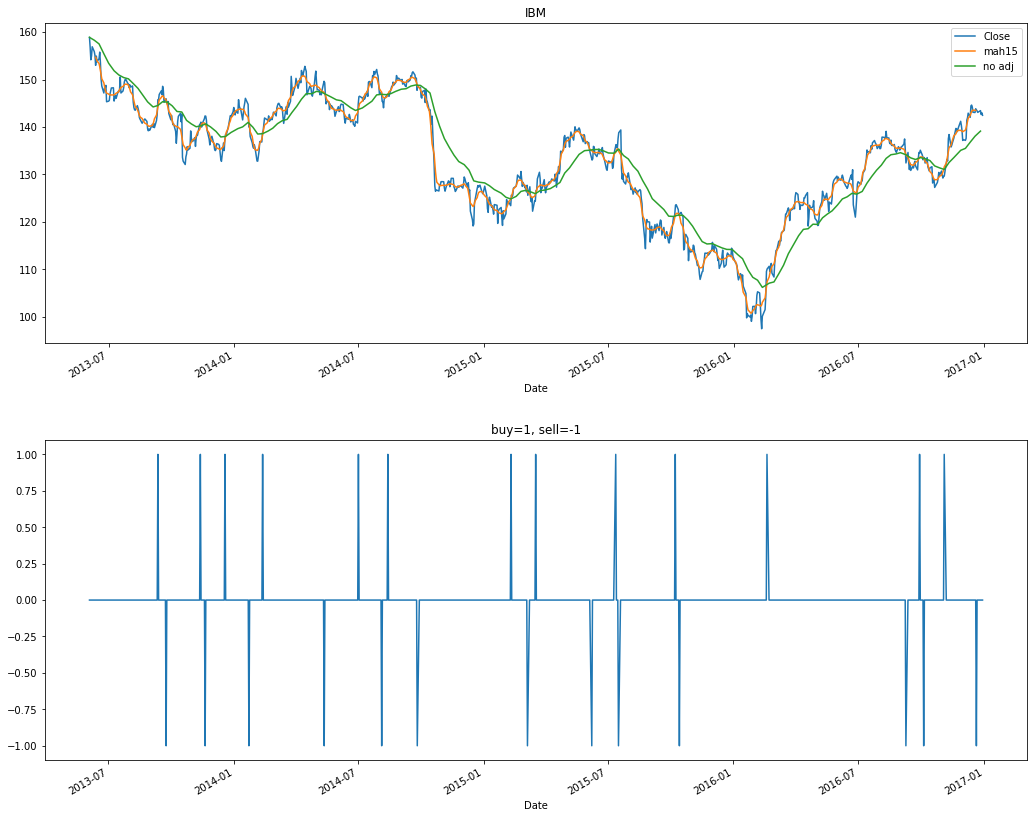

In [68]:
tmprice, tmpss3 = show_trend_end2end('IBM')

In [86]:
tmprice.loc[tmprice['intersect'] != 0]

,Adj Close,mah15,ema5,sign,intersect
Date,,,,,
2013-09-12,145.752075,145.036434,144.686944,1,1.0
2013-09-24,145.171295,145.164918,145.247196,0,-1.0
2013-11-13,141.018494,140.308120,140.243188,1,1.0
2013-11-20,142.278503,140.411295,140.650251,0,-1.0
2013-12-19,138.460144,138.029549,138.009691,1,1.0
2014-01-23,140.388519,140.087759,140.564139,0,-1.0
2014-02-12,139.234680,139.047462,138.689159,1,1.0
2014-05-13,149.330383,147.022094,147.064073,0,-1.0
2014-07-02,146.377823,144.341758,143.796993,1,1.0


In [91]:
tmprice.tail()

,Adj Close,mah15,ema5,sign,intersect
Date,,,,,
2016-12-14,144.625107,143.259807,137.307406,1,0.0
2016-12-15,144.204575,143.455737,137.557278,1,0.0
2016-12-16,143.097397,143.545738,137.807150,1,0.0
2016-12-19,143.054459,143.541196,138.057022,1,0.0
2016-12-20,143.844101,143.485355,138.272711,1,0.0


In [92]:
tmprice.iloc[-1]['Adj Close']

143.84410095214844

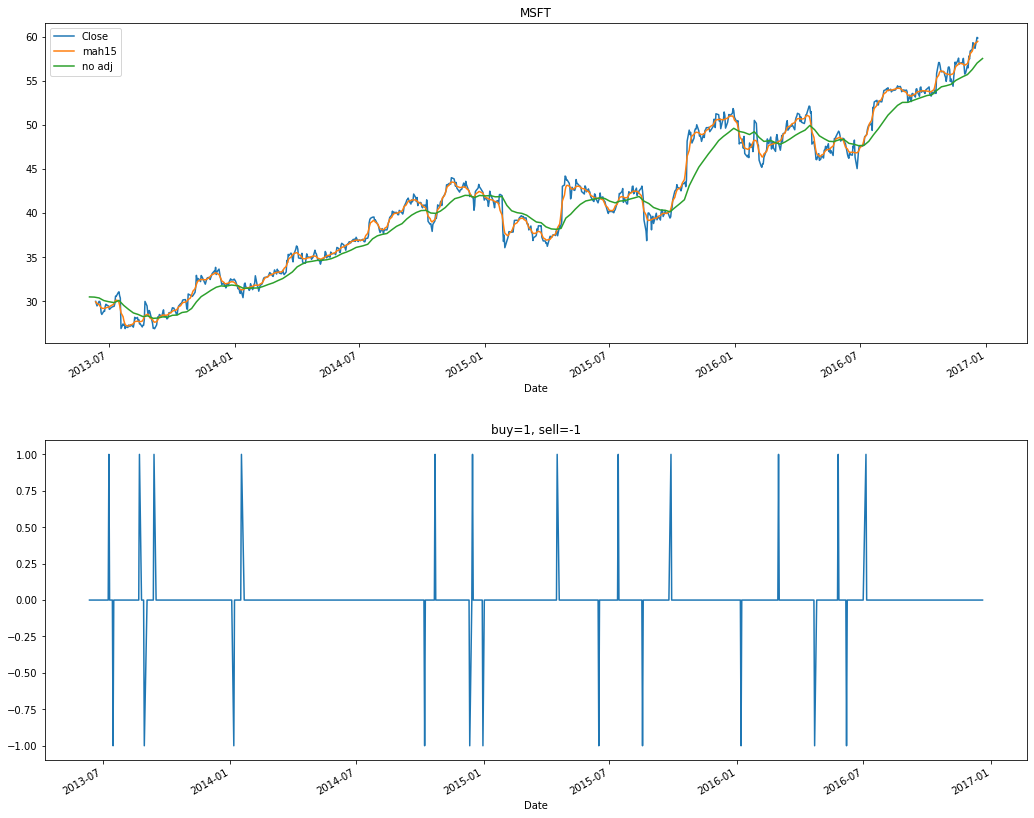

In [74]:
tmprice, tmpss3 = show_trend_end2end('MSFT')

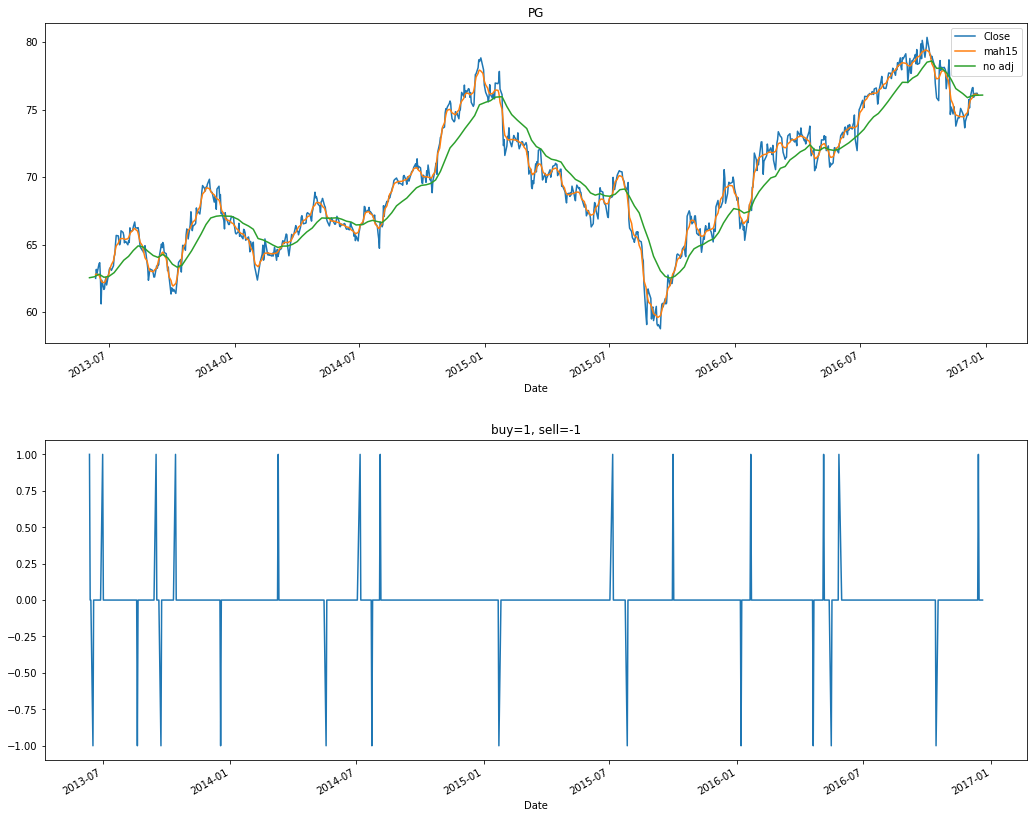

In [75]:
tmprice, tmpss3 = show_trend_end2end('PG')

In [79]:
tmprice.loc[tmprice['intersect'] != 0][-3:]

,Adj Close,mah15,ema5,sign,intersect
Date,,,,,
2016-05-27,72.134254,72.091498,72.032679,1,1.0
2016-10-14,78.948547,78.405400,78.600863,0,-1.0
2016-12-14,75.904976,76.090325,76.040754,1,1.0


In [ ]:
tmprice['ema5'] = tmpss3
tmprice['ema5'].interpolate(inplace=True)
tmprice['sign']= (tmprice['mah15'] - tmprice['ema5'] > 0).astype(int)
#tmprice['sign'] = tmprice['sign'].astype(int)
tmprice['intersect']= tmprice['sign'] - tmprice['sign'].shift(1)

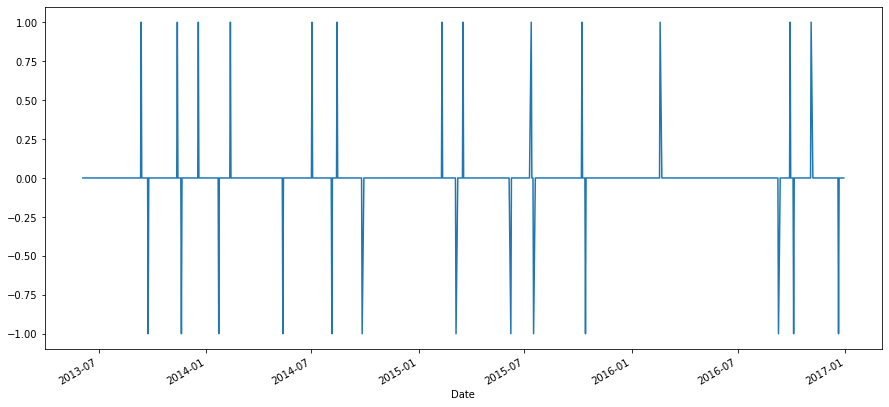

In [46]:
plt.figure(figsize=(15,7))
tmprice['intersect'].plot()

In [32]:
tmprice.head(15)

,Adj Close,mah15,ema5
Date,,,
2013-06-03,158.881210,NaN,158.881210
2013-06-04,156.782547,NaN,158.761680
2013-06-05,154.159286,NaN,158.642150
2013-06-06,154.965256,NaN,158.522620
2013-06-07,156.904221,NaN,158.403090
2013-06-10,155.892960,NaN,158.283560
2013-06-11,155.102081,NaN,158.127711
2013-06-12,152.988281,154.700787,157.971862
2013-06-13,154.942413,154.349361,157.816012


In [29]:
tmprice.head(15)

,Adj Close,mah15,ema5
Date,,,
2013-06-03,158.881210,NaN,158.881210
2013-06-04,156.782547,NaN,NaN
2013-06-05,154.159286,NaN,NaN
2013-06-06,154.965256,NaN,NaN
2013-06-07,156.904221,NaN,NaN
2013-06-10,155.892960,NaN,158.283560
2013-06-11,155.102081,NaN,NaN
2013-06-12,152.988281,154.700787,NaN
2013-06-13,154.942413,154.349361,NaN


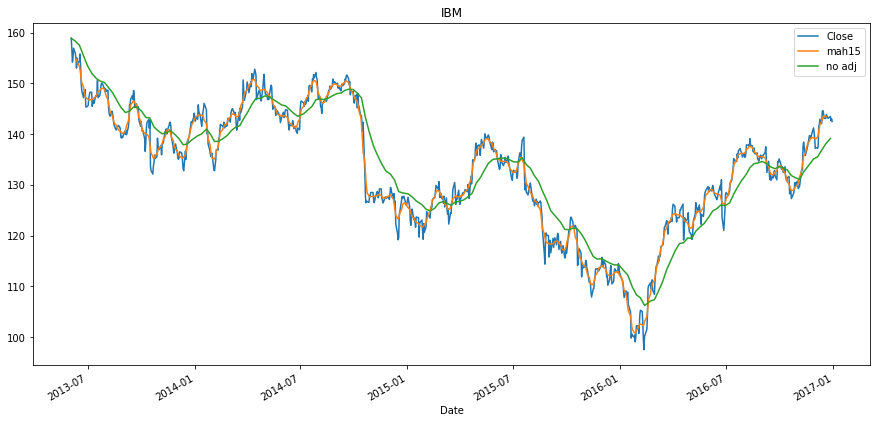

In [16]:
show_trend_end2end('IBM')

In [9]:
# Load the prices data for a stock
start = '2013-06-01'
end = '2016-12-31'
ticker= 'PG'
data = yf.download(ticker, start=start, end=end, progress=False)

In [12]:
m = 'Adj Close'
prices = pd.DataFrame(data[m])

In [13]:
prices['mu'] = [prices[m][:i].mean() for i in range(len(prices))]
prices['mah5'] = prices[m].rolling(5, center=True, win_type='hamming').mean()
prices['mah15'] = prices[m].rolling(15, center=True, win_type='hamming').mean()
prices['mah30'] = prices[m].rolling(30, center=True, win_type='hamming').mean()
prices['mah60'] = prices[m].rolling(60, center=True, win_type='hamming').mean()
prices['sma90'] = prices[m].rolling(90, center=True).mean()
prices['sma200'] = prices[m].rolling(200, center=True).mean()
prices['sma30'] = prices[m].rolling(30, center=True).mean()
prices['sma60'] = prices[m].rolling(60, center=True).mean()
ss1 = prices[m]
ss2 = ss1[ss1.index[0:ss1.shape[0]:5]]


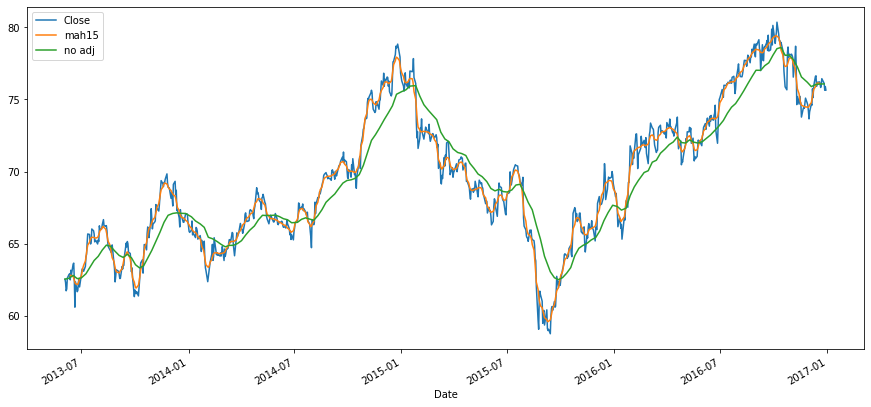

In [14]:
plt.figure(figsize=(15,7))
plt.plot(prices[m], label='Close')
plt.plot(prices['mah15'], label='mah15');
#plt.plot(prices['mu'], label='mu');
#plt.plot(prices['mah30'], label='mah30');
#plt.plot(prices['mah60'], label='mah60');
ss2.ewm(span=9, adjust=False).mean().plot(label='no adj')
#plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2015-01-01'))
plt.legend();

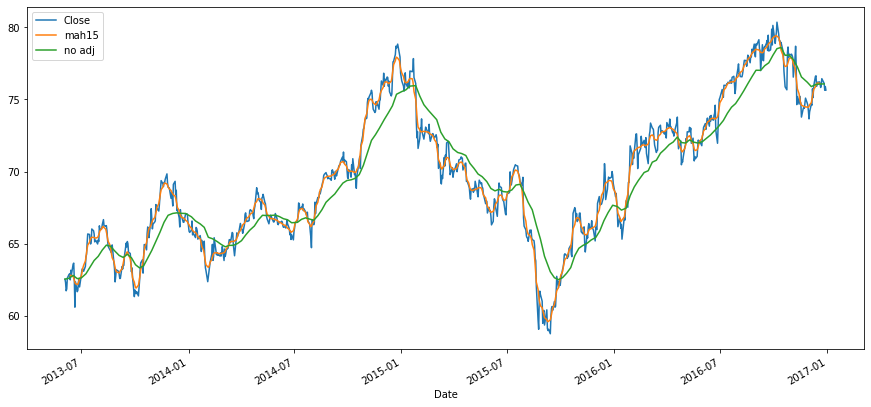

In [132]:
plt.figure(figsize=(15,7))
plt.plot(prices[m], label='Close')
plt.plot(prices['mah15'], label='mah15');
#plt.plot(prices['mu'], label='mu');
#plt.plot(prices['mah30'], label='mah30');
#plt.plot(prices['mah60'], label='mah60');
ss2.ewm(span=9, adjust=False).mean().plot(label='no adj')
#plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2015-01-01'))
plt.legend();

In [4]:
start = '2013-06-01'
end = '2016-12-31'
ticker= 'MSFT'
msft = yf.download(ticker, start=start, end=end, progress=False)

In [5]:
m = 'Adj Close'
msft_prices = pd.DataFrame(msft[m])


In [6]:
msft_prices['mu'] = [msft_prices[m][:i].mean() for i in range(len(msft_prices))]
msft_prices['mah5'] = msft_prices[m].rolling(5, center=True, win_type='hamming').mean()
msft_prices['mah15'] = msft_prices[m].rolling(15, center=True, win_type='hamming').mean()
msft_prices['mah30'] = msft_prices[m].rolling(30, center=True, win_type='hamming').mean()
msft_prices['mah60'] = msft_prices[m].rolling(60, center=True, win_type='hamming').mean()
msft_prices['sma90'] = msft_prices[m].rolling(90, center=True).mean()
msft_prices['sma200'] = msft_prices[m].rolling(200, center=True).mean()
msft_prices['sma30'] = msft_prices[m].rolling(30, center=True).mean()
msft_prices['sma60'] = msft_prices[m].rolling(60, center=True).mean()
ss1 = msft_prices[m]
ss2 = ss1[ss1.index[0:ss1.shape[0]:5]]


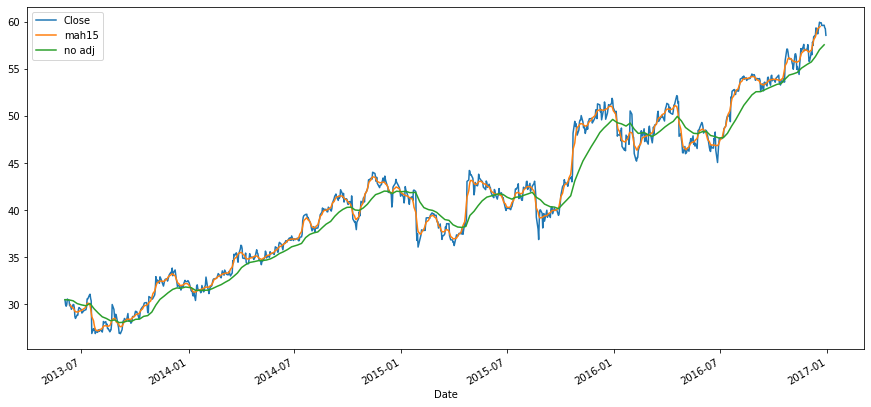

In [8]:
plt.figure(figsize=(15,7))
plt.plot(msft_prices[m], label='Close')
plt.plot(msft_prices['mah15'], label='mah15');
#plt.plot(prices['mu'], label='mu');
#plt.plot(prices['mah30'], label='mah30');
#plt.plot(prices['mah60'], label='mah60');
ss2.ewm(span=9, adjust=False).mean().plot(label='no adj')
#plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2015-01-01'))
plt.legend();

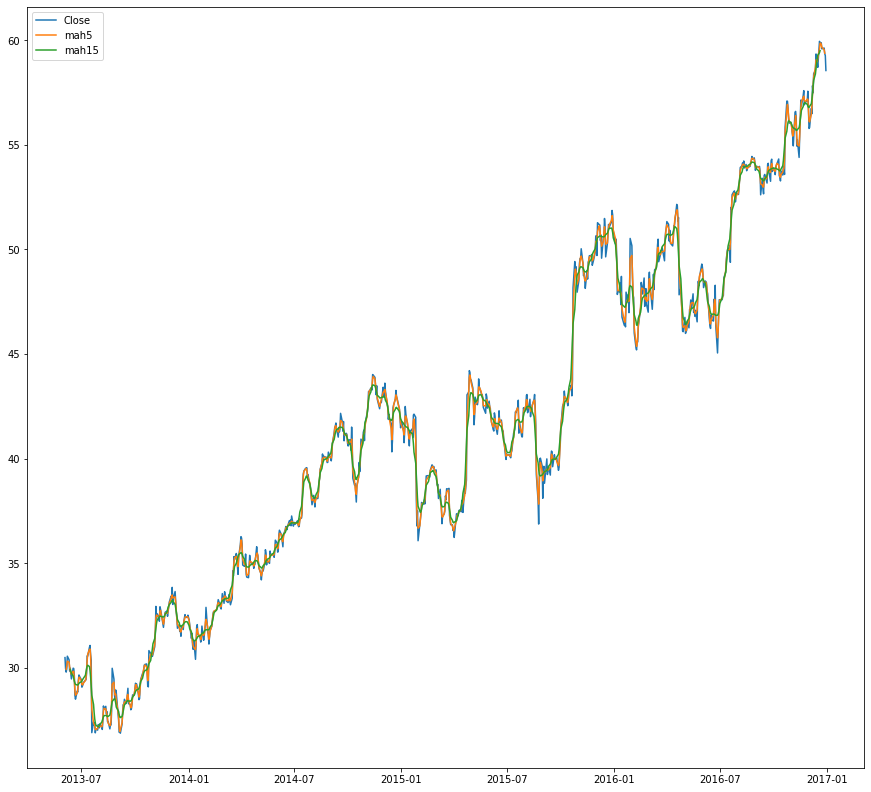

In [148]:
plt.figure(figsize=(15,14))
plt.plot(msft_prices[m], label='Close')
plt.plot(msft_prices['mah5'], label='mah5');
plt.plot(msft_prices['mah15'], label='mah15');
#plt.plot(msft_prices['mu'], label='mu');
#plt.plot(msft_prices['mah30'], label='mah30');
plt.legend();

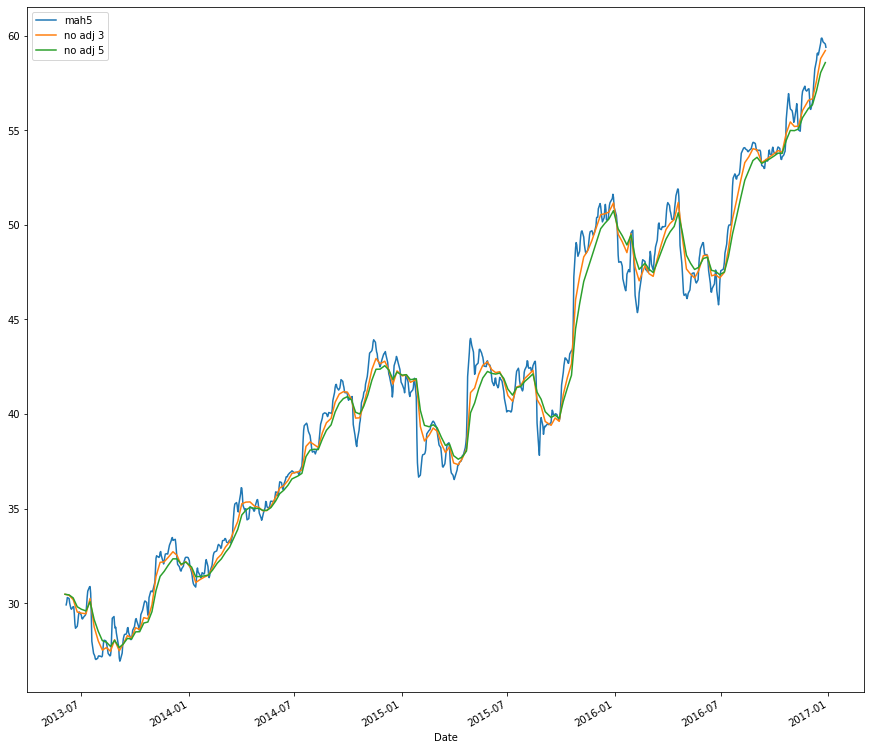

In [153]:
plt.figure(figsize=(15,14))
#plt.plot(msft_prices[m], label='Close')
plt.plot(msft_prices['mah5'], label='mah5');
#plt.plot(msft_prices['mu'], label='mu');
#plt.plot(msft_prices['mah30'], label='mah30');
#plt.plot(msft_prices['mah60'], label='mah60');
ss2.ewm(span=3, adjust=False).mean().plot(label='no adj 3')
ss2.ewm(span=5, adjust=False).mean().plot(label='no adj 5')
#ss2.ewm(span=9, adjust=False).mean().plot(label='no adj 9')
#plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2015-01-01'))
plt.legend();

In [140]:
def proc_plot_end2end(df):
    m = 'Adj Close'
    df_prices = pd.DataFrame(df[m])
    ss1 = df_prices[m]
    ss2 = ss1[ss1.index[0:ss1.shape[0]:5]]

    df_prices['mu'] = [df_prices[m][:i].mean() for i in range(len(df_prices))]
    df_prices['mah15'] = df_prices[m].rolling(15, center=True, win_type='hamming').mean()
#    df_prices['mah30'] = df_prices[m].rolling(30, center=True, win_type='hamming').mean()
#    df_prices['mah60'] = df_prices[m].rolling(60, center=True, win_type='hamming').mean()
#    df_prices['sma90'] = df_prices[m].rolling(90, center=True).mean()
#    df_prices['sma200'] = df_prices[m].rolling(200, center=True).mean()
#    df_prices['sma30'] = df_prices[m].rolling(30, center=True).mean()
#    df_prices['sma60'] = df_prices[m].rolling(60, center=True).mean()

    plt.figure(figsize=(15,7))
    plt.plot(df_prices[m], label='Close')
    plt.plot(df_prices['mah15'], label='mah15');
    #plt.plot(df_prices['mu'], label='mu');
    #plt.plot(df_prices['mah30'], label='mah30');
    #plt.plot(df_prices['mah60'], label='mah60');
    ss2.ewm(span=9, adjust=False).mean().plot(label='no adj')
    #plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2015-01-01'))
    plt.legend();


In [58]:
type (data)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-03,76.870003,77.699997,76.120003,77.660004,62.539295,11720600
2013-06-04,77.709999,78.470001,76.750000,77.370003,62.305752,11379300
2013-06-05,77.080002,77.209999,76.629997,76.660004,61.733978,8826900
2013-06-06,76.559998,76.970001,75.830002,76.820000,61.862839,11099900
2013-06-07,77.440002,78.279999,77.269997,77.750000,62.611774,7839500


In [19]:
m = 'Adj Close'
prices = pd.DataFrame(data[m])

In [23]:
s = prices[m]

In [30]:
s20 = s.rolling(30, center=True, win_type='hamming').mean()

In [31]:
s20.head()

Date
2013-06-03   NaN
2013-06-04   NaN
2013-06-05   NaN
2013-06-06   NaN
2013-06-07   NaN
Name: Adj Close, dtype: float64

In [20]:
# Compute the cumulative moving average of the price
prices['mu'] = [prices[m][:i].mean() for i in range(len(prices))]

In [125]:
prices['mah15'] = prices[m].rolling(15, center=True, win_type='hamming').mean()
prices['mah30'] = prices[m].rolling(30, center=True, win_type='hamming').mean()
prices['mah60'] = prices[m].rolling(60, center=True, win_type='hamming').mean()


In [118]:
prices['sma90'] = prices[m].rolling(90, center=True).mean()
prices['sma200'] = prices[m].rolling(200, center=True).mean()
prices['sma30'] = prices[m].rolling(30, center=True).mean()
prices['sma60'] = prices[m].rolling(60, center=True).mean()
ss1 = prices['Adj Close']
ss2 = ss1[ss1.index[0:ss1.shape[0]:5]]


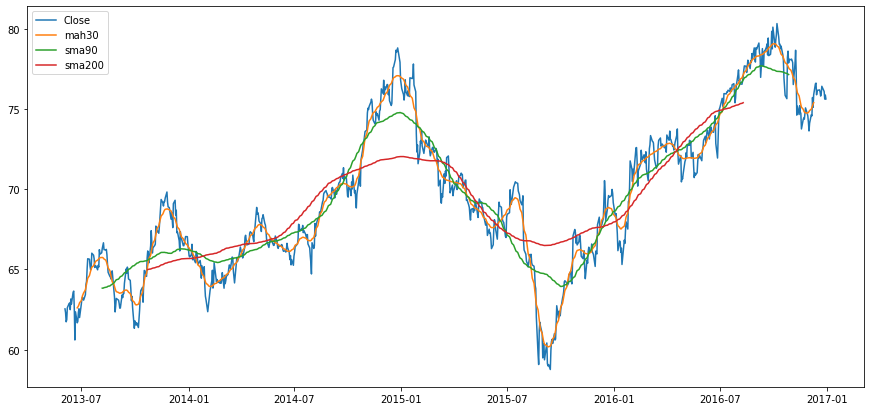

In [55]:
plt.figure(figsize=(15,7))
plt.plot(prices[m], label='Close')
plt.plot(prices['mah30'], label='mah30');
#plt.plot(prices['sma30'], label='sma30');
#plt.plot(prices['sma60'], label='sma60');
plt.plot(prices['sma90'], label='sma90');
plt.plot(prices['sma200'], label='sma200');
plt.legend();

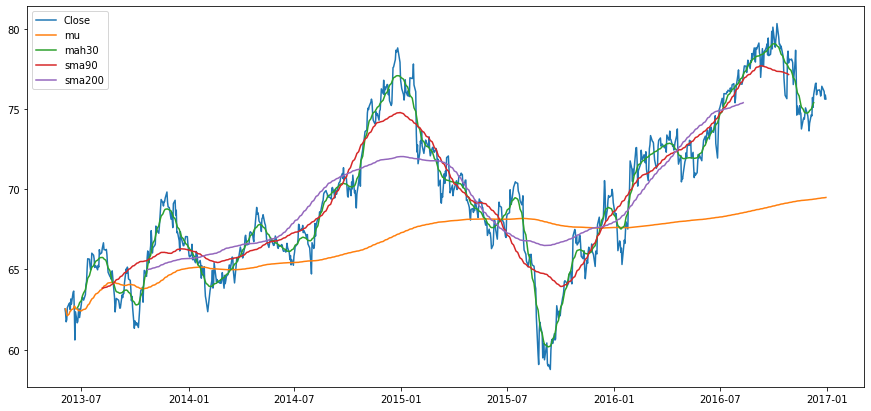

In [40]:
# Plot the price and the moving average
plt.figure(figsize=(15,7))
plt.plot(prices[m], label='Close')
plt.plot(prices['mu'], label='mu');
plt.plot(prices['mah30'], label='mah30');
plt.plot(prices['sma90'], label='sma90');
plt.plot(prices['sma200'], label='sma200');

plt.legend();

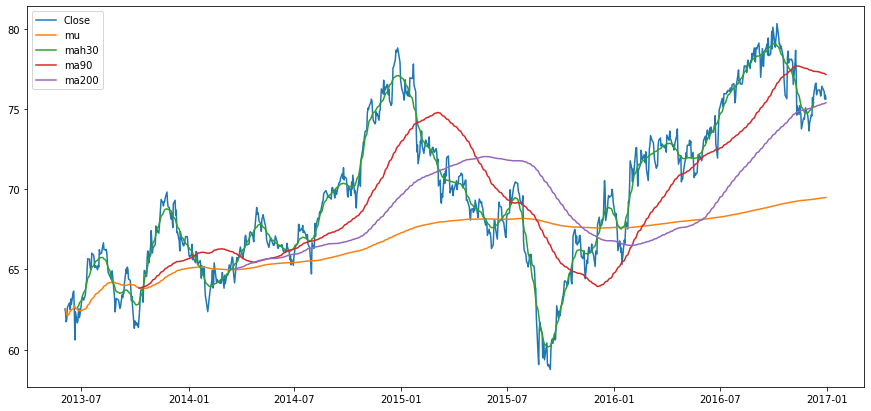

In [36]:
# Plot the price and the moving average
plt.figure(figsize=(15,7))
plt.plot(prices[m], label='Close')
plt.plot(prices['mu'], label='mu');
plt.plot(prices['mah30'], label='mah30');
plt.plot(prices['sma90'], label='ma90');
plt.plot(prices['sma200'], label='ma200');

plt.legend();
#plt.show()

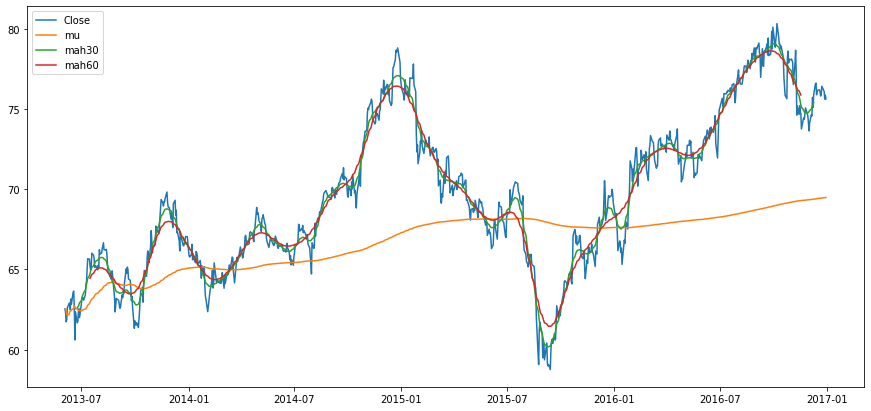

In [42]:
# Plot the price and the moving average
plt.figure(figsize=(15,7))
plt.plot(prices[m], label='Close')
plt.plot(prices['mu'], label='mu');
plt.plot(prices['mah30'], label='mah30');
plt.plot(prices['mah60'], label='mah60');

plt.legend();

In [59]:
prices.index

DatetimeIndex(['2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06',
               '2013-06-07', '2013-06-10', '2013-06-11', '2013-06-12',
               '2013-06-13', '2013-06-14',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=904, freq=None)

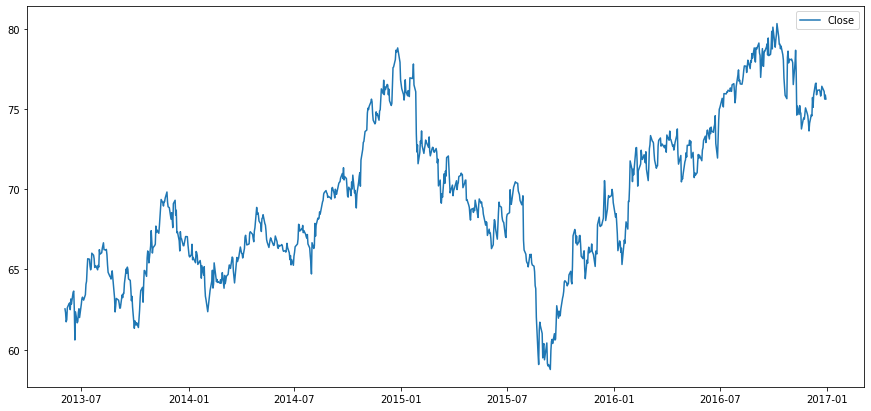

In [128]:
plt.figure(figsize=(15,7))
plt.plot(prices[m], label='Close')
#plt.plot(prices['mah15'], label='mah15');
#plt.plot(prices['mu'], label='mu');
#plt.plot(prices['mah30'], label='mah30');
#plt.plot(prices['mah60'], label='mah60');
#ss2.ewm(span=9, adjust=False).mean().plot(label='no adj')
#plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2015-01-01'))
plt.legend();

In [80]:
def find_trend(s):
    idx = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 71, 81, 91]
    weights = [0.35, 0.3, 0.25, 0.2, 0.18, 0.16, 0.14, 0.12, 0.1, 0.08, 0.075, 0.07, 0.065, 0.06, 0.055]
    slope = []
    allweight = 0
    auc = 0
    for i in range(len(weights)):
        s1 = idx[i] * -1
        s2 = idx[i+1] * -1
        ds = s1 - s2
        w = weights[i]
        m = (s.iloc[s1] - s.iloc[s2]) / ds
        auc += w * m
        allweight += w
        slope.append((s.iloc[s2], s.iloc[s1], ds, m))
    auc = round(auc / allweight, 4)
    return auc, slope

        
        

In [74]:
ss = prices['mah30'].loc[pd.to_datetime('2014-01-01'): pd.to_datetime('2014-12-31')]

In [75]:
ss.head()

Date
2014-01-02    66.350512
2014-01-03    66.270417
2014-01-06    66.185498
2014-01-07    66.108923
2014-01-08    66.024200
Name: mah30, dtype: float64

In [73]:
ss.index[-91]

Timestamp('2014-08-22 00:00:00')

In [81]:
find_trend(ss)

(0.0864,
 [(77.06928078115483, 77.01097525990474, 5, -0.011661104250018184),
  (76.70748154669613, 77.06928078115483, 5, 0.07235984689174017),
  (76.17962583233336, 76.70748154669613, 5, 0.10557114287255445),
  (75.66182519880263, 76.17962583233336, 5, 0.10356012670614519),
  (75.1982291206919, 75.66182519880263, 5, 0.09271921562214516),
  (74.85223189023822, 75.1982291206919, 5, 0.0691994460907381),
  (74.40874509175966, 74.85223189023822, 5, 0.08869735969571195),
  (73.46178825052033, 74.40874509175966, 5, 0.18939136824786545),
  (72.0724186866788, 73.46178825052033, 5, 0.2778739127683053),
  (70.84171808698245, 72.0724186866788, 5, 0.24614011993926965),
  (70.2211272205243, 70.84171808698245, 5, 0.1241181732916317),
  (70.17249204535256, 70.2211272205243, 5, 0.009727035034347863),
  (70.35922041256366, 70.17249204535256, 10, -0.018672836721110288),
  (69.88140455518815, 70.35922041256366, 10, 0.047781585737550356),
  (69.19928765767939, 69.88140455518815, 10, 0.0682116897508763)])

In [ ]:
for i in ss.index[0:ss.shape[0]:5]:
    print(i, ss.loc[i])

In [85]:
idx = ss.index[0:ss.shape[0]:5]
dd = ss[idx]
s1 = pd.Series(data=dd.values, index=idx)

In [96]:
s1.head()

Date
2014-01-02    66.350512
2014-01-09    65.937110
2014-01-16    65.415492
2014-01-24    64.729161
2014-01-31    64.134041
dtype: float64

In [86]:
dd.head()

Date
2014-01-02    66.350512
2014-01-09    65.937110
2014-01-16    65.415492
2014-01-24    64.729161
2014-01-31    64.134041
Name: mah30, dtype: float64

In [ ]:
def find_trend_wma(ss, stepSz=5):
    for i in ss.index(0:ss.shape[0], stepSz):
        

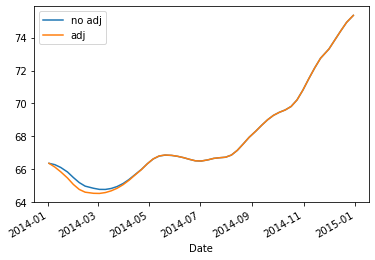

In [109]:
s1.ewm(span=9, adjust=False).mean().plot(label='no adj')
s1.ewm(span=9, adjust=True).mean().plot(label='adj')
plt.legend()
#prices['Adj Close'].ewm(14).mean().plot()

In [110]:
ss1 = prices['Adj Close']
ss2 = ss1[ss1.index[0:ss1.shape[0]:5]]

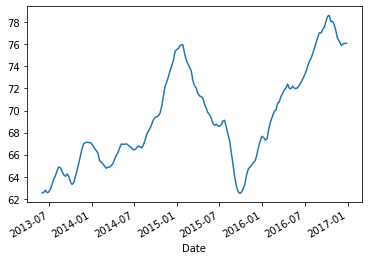

In [115]:
ss2.ewm(span=9, adjust=False).mean().plot(label='no adj')

In [102]:
prices.head()

,Adj Close,mu,mah30,sma90,sma200,mah60,sma30,sma60
Date,,,,,,,,
2013-06-03,62.539295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-04,62.305752,62.539295,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-05,61.733978,62.422523,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-06,61.862839,62.193008,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-07,62.611774,62.110466,NaN,NaN,NaN,NaN,NaN,NaN


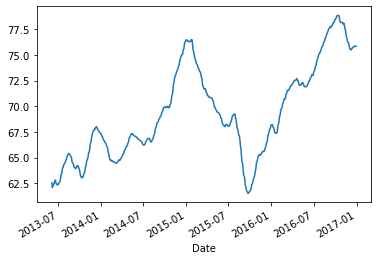

In [103]:
prices['Adj Close'].ewm(14).mean().plot()

Note that since we are computing the running average, "reverting to the mean" does not necessarily mean going as high or as low as it did before.

In order to trade using this strategy, we need to quantify what it means for the price to be higher or lower than expected. It's useful to compute the z-score of the price on each day, which tells us how many standard deviations away from the mean a value is:
$$ z = \frac{x - \mu}{\sigma} $$

where $x$ is the value, $\mu$ is the mean of the data set, and $\sigma$ is its standard deviation. So a price with a z-score $> 1$ is more than one standard deviation above the mean, and we will sell short when this happens. If the price on a day has a z-score $< 1$, we will buy long. If the price is within half a standard deviation of the mean, we will clear all positions.

In [154]:
prices.head()

,Adj Close,mu,mah30,sma90,sma200,mah60,sma30,sma60,mah15
Date,,,,,,,,,
2013-06-03,62.539295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-04,62.305752,62.539295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-05,61.733978,62.422523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-06,61.862839,62.193008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-07,62.611774,62.110466,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Compute the z-scores for each day using the historical data up to that day
m='Adj Close'
zscores = [(prices[m][i] - prices['mu'][i]) / np.std(prices[m][:i]) for i in range(len(prices))]

# Start with no money and no positions
money = 0
count = 0
shortCnt = 0
longCnt = 0
clearCnt = 0
for i in range(len(prices)):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        money += prices[m][i]
        count -= 1
        shortCnt += 1
    # Buy long if the z-score is < 1
    elif zscores[i] < -1:
        money -= prices[m][i]
        count += 1
        longCnt += 1
    # Clear positions if the z-score between -.5 and .5
    elif abs(zscores[i]) < 0.5:
        money += count*prices[m][i]
        count = 0
        clearCnt += 1
holding = count * prices[m][-1]
print (money, count)
print('holding=', holding, 'balance=', money + holding)
print('shortcnt:', shortCnt, 'longCnt:', longCnt, 'clearCnt:', clearCnt, 'totalCnt:', shortCnt+longCnt+clearCnt)

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


16054.108131408691 -201
holding= -15204.458770751953 balance= 849.6493606567383
shortcnt: 445 longCnt: 49 clearCnt: 222 totalCnt: 716


In [157]:
prices[m][-1]

75.64407348632812

In [45]:
z = np.array(zscores)

In [48]:
z[0:10]

array([        nan,        -inf, -5.89650779, -0.97597621,  1.53777532,
        1.86145877,  1.45219215,  0.2013749 ,  1.85114878,  0.76175992])

The danger of applying mean reversion to a single stock is that it exposes us to the movement of the market and the success or failure of the individual company, among other factors. If there is a persistent trend affecting the price of the security, we will find ourselves consitently undervaluing (if the price is moving steadily upward) or overvaluing (if the price is falling) the asset. Below we discuss two strategies that mitigate this risk.

# Mean reversion portfolio

Instead of taking the mean of the historical returns on an asset, we can look at the mean of the returns on all of the stocks in, say, the S&P 500. Hypothesizing that the worst-performing stocks last period will do better this period (that is, they are likely to be undervalued) and vice versa, we go long in stocks that performed poorly and short in stocks that performed well.

This approach has the advantage of being market-neutral, so that we do not treat stocks as undervalued just because the market as a whole is falling, or overvalued when the market is rising. Furthermore, by including a large number of securities in portfolio, we are likely to encounter many cases where our prediction is correct.

To construct a portfolio which takes advantage of mean reversion, we first select a universe, such as all S&P 500 stocks or the top-traded stocks on the NYSE. From this universe, we rebalance our portfolio every period (say, every week) by going short in the stocks in the bottom 20% of returns over the last period and long in the stocks in the top 20% of returns. If a stock is in neither of those quintiles, we do not include it in our portfolio.

We can construct a toy example using sector ETFs instead of a large basket of stocks:

Reading AAPL
Reading AIG
Reading C
Reading T
Reading PG
Reading JNJ
Reading EOG
Reading MET
Reading DOW
Reading AMGN


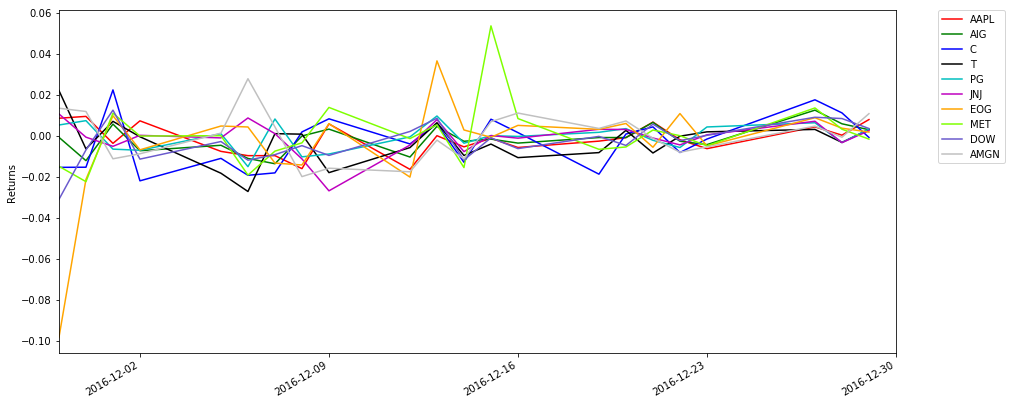

In [3]:
# Fetch prices data for 10 stocks from different sectors and plot returns
start = '2016-12-01'
end = '2016-12-31'
assets = ['AAPL', 'AIG', 'C', 'T', 'PG', 'JNJ', 'EOG', 'MET', 'DOW', 'AMGN']
data = dl.load_data_nologs('nasdaq', assets, start, end)
prices = data['ADJ CLOSE']
returns = prices/prices.shift(-1) -1
returns.plot(figsize=(15,7), color=['r', 'g', 'b', 'k', 'c', 'm', 'orange',
                                     'chartreuse', 'slateblue', 'silver'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Returns')

# Convert to numpy array to make manipulation easier
data = np.array(prices);

We hypothesize that the stocks which do well for the first week will regress after another month, while those which do poorly at first will appreciate in value.

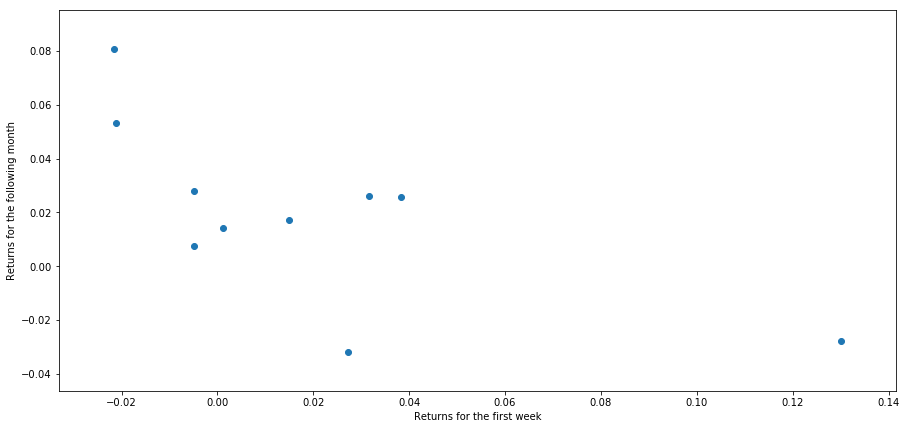

In [4]:
# For each security, take the return for the first week
wreturns = (data[4] - data[0])/data[0]
# Rank securities by return, with 0 being the lowest return
order = wreturns.argsort()
ranks = order.argsort()

# For each security, take the return for the month following the first week
# Normalization for the time period doesn't matter since we're only using the returns to rank them
mreturns = (data[-1] - data[5])/data[5]
order2 = mreturns.argsort()
ranks2 = order2.argsort()

# Plot the returns for the first week vs returns for the next month to visualize them
plt.figure(figsize=(15,7))
plt.scatter(wreturns, mreturns)
plt.xlabel('Returns for the first week')
plt.ylabel('Returns for the following month');

The returns look like they could be anticorrelated, but what would have happened if we had followed the mean-reversion strategy when we examined the past week's returns?

In [105]:
# Go long (by one share each) in the bottom 20% of securities and short in the top 20%
longs = np.array([int(x < 2)for x in ranks])
shorts = np.array([int(x > 7) for x in ranks])
print 'Going long in:', [assets[i] for i in range(len(assets)) if longs[i]]
print 'Going short in:', [assets[i] for i in range(len(assets)) if shorts[i]]

# Resolve all positions and calculate how much we would have earned
print 'Yield:', sum((data[-1] - data[4])*(longs - shorts))

Going long in: ['AAPL', 'T']
Going short in: ['EOG', 'DOW']
Yield: 12.320874


# Pairs trading

In pairs trading, the quantity we are examining is the distance between two securities, which we expect to revert back to its mean. For this to be a reasonable assumption, we need the two securities to be statistically <i>cointegrated</i>. In practice, two companies whose products are substitutes for each other are often cointegrated. That is, they generally move together due to shifts in the market and in their specific industry, and move little relative to each other.

How do we incorporate the prediction about their difference into our portfolio? Suppose we are looking at two securities X and Y. Then we go long in X and short in Y when the two are closer together than expected, and short in X and long in Y when the two are far apart. In this way we remain neutral to the market, industry, and other shifts that cause X and Y to move together, while making money on their difference reverting to the mean. We can quantify "closer than expected" as the difference having a z-score of less than -1, and "farther apart than expected" as a z-score greater than 1. This is easier to picture if X's price is higher than Y's, but the end result is the same in either case.

Using the `coint` function from `statsmodels`, let's check whether HP and Microsoft stock prices are cointegrated.

In [6]:
from statsmodels.tsa.stattools import coint
start = '2012-01-01'
end = '2016-12-31'
# Load prices data for HP and Microsoft
data = dl.load_data_nologs('nasdaq', ['MSFT', 'HP'], start, end)
X = data['ADJ CLOSE']['MSFT']
Y = data['ADJ CLOSE']['HP']
# Compute the p-value for the cointegration of the two series
_, pvalue, _ = coint(X,Y)
print pvalue

Reading MSFT
Reading HP
0.963589073908


The p-value is low, so the two series are cointegrated. Next we need to find the mean of the difference. We'll compute the cumulative moving average - that is, the average of all the values up to each day - as though we were looking at the data every day without knowing the future.

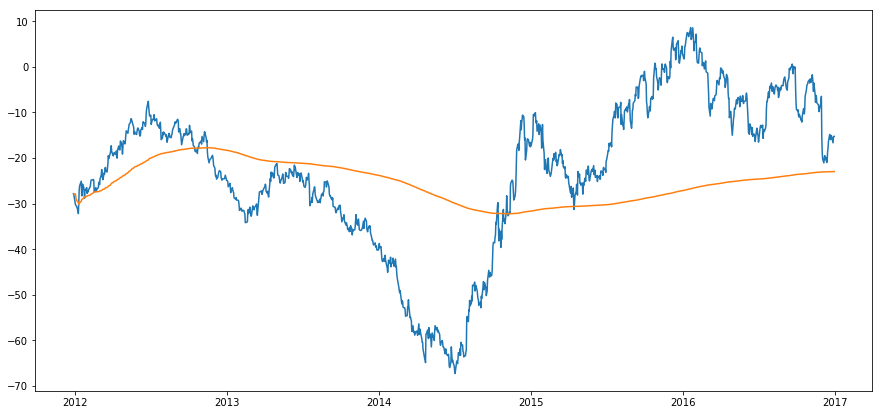

In [7]:
# Plot their difference and the cumulative moving average of their difference
val = pd.DataFrame(index = X.index, columns=['diff','mu'])
val['diff'] = X - Y
val['mu']= [val['diff'][:i].mean() for i in range(len(val['diff']))]
plt.figure(figsize=(15,7))
plt.plot(val['diff'])
plt.plot(val['mu'])
plt.show()

In some cases, we may instead want our mean to refer only to the moving average, excluding data from too long ago. Below we can see the difference between the cumulative moving average and the 60-day running average.

C:\Users\Chandini\Miniconda3\envs\auquan\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=90,center=False).mean()
  if __name__ == '__main__':


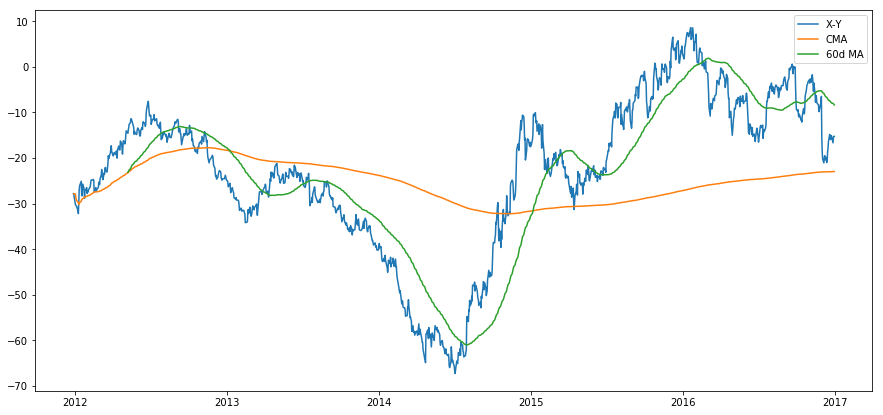

In [8]:
mu_60d = pd.rolling_mean(val['diff'], window=90)
plt.figure(figsize=(15,7))
plt.plot(val['diff'], label='X-Y')
plt.plot(val['mu'], label='CMA')
plt.plot(mu_60d, label='60d MA')
plt.legend();

From here our trading strategy is identical to that for a single security, where we replace the asset with the spread X-Y. When we short the spread, we buy Y and sell X, and vice versa for going long. We'll be using the CMA for the mean, but you can easily change it to see the difference. Keep in mind, however, that what works well with this data may not be suited for other situations, and each definition of the mean will sometimes outperform the other.

In [132]:
# Compute the z-score of the difference on each day
zscores = [(val['diff'][i] - val['mu'][i]) / np.std(val['diff'][:i]) for i in range(len(val['diff']))]

# Start with no money and no positions
money = 0
count = 0
for i in range(len(val['diff'])):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        money += val['diff'][i]
        count -= 1
    # Buy long if the z-score is < 1
    elif zscores[i] < -1:
        money -= val['diff'][i]
        count += 1
    # Clear positions if the z-score between -.5 and .5
    elif abs(zscores[i]) < 0.5:
        money += count*val['diff'][i]
        count = 0
        
print money

C:\Users\Chandini\Miniconda3\envs\auquan\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


6527.55837


# Alternative approaches

Mean-reversion strategies assume that trends tend to reverse direction. On the opposite end of the spectrum are trend-following or momentum-based strategies. These hypothesize that prices will, despite fluctuations, generally move in the direction they were moving in before. They can also take into account how quickly a price is moving, and anticipate changes in the direction of movement when it slows down. These are covered in more detail in another notebook.